# effect of the living area on the price

In [2]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
df_final = df_final.dropna(subset=['Living_Area'])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


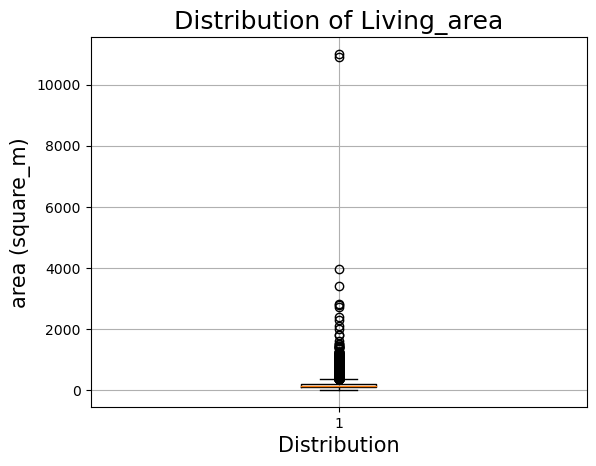

In [3]:
plt.boxplot(df_final['Living_Area'])
plt.xlabel('Distribution', fontsize=15)
plt.ylabel("area (square_m)", fontsize=15)

plt.title('Distribution of Living_area', fontsize=18)
plt.grid(True)

plt.show()

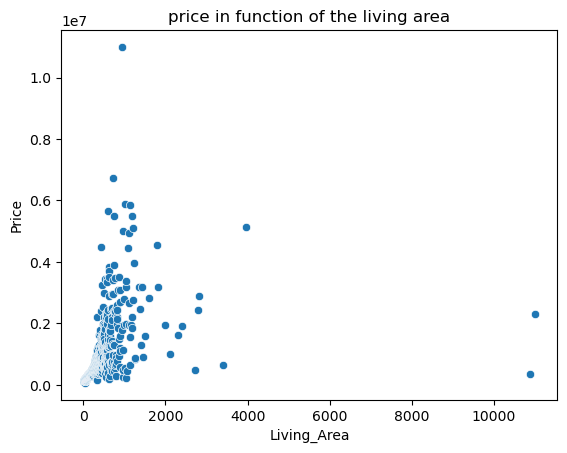

In [4]:
median_price_by_rooms = df_final.groupby("Living_Area")["Price"].median().reset_index()
sns.scatterplot(x="Living_Area", y="Price", data=median_price_by_rooms)
plt.title("price in function of the living area")
plt.savefig(r'.\images\liv_area.jpg')
plt.show()

Hard to see...........

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

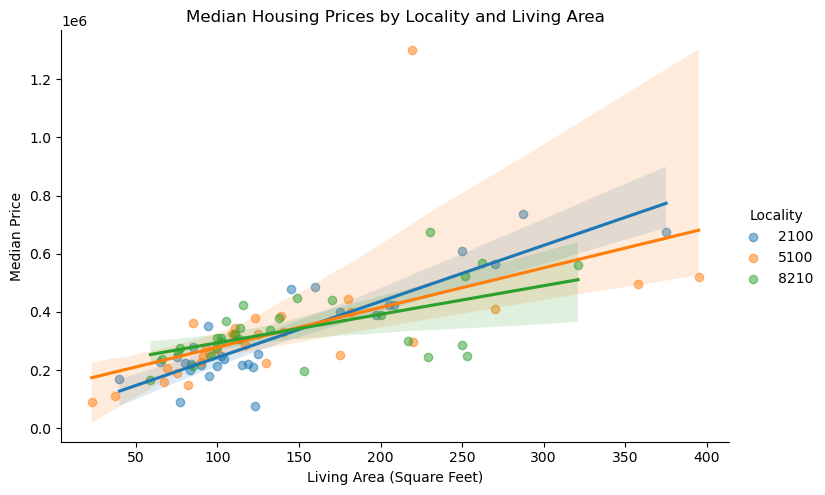

In [28]:


# Compute the median price by number of rooms for each locality
groupby_area = df_final.groupby(["Locality", "Living_Area"])["Price"].median().reset_index()

# Filter the dataframe to include only the first 10 localities
sample_localities = groupby_area['Locality'].value_counts().sort_values(ascending=False).index[100:103]
groupby_area = groupby_area[groupby_area['Locality'].isin(sample_localities)]

# Increase the size of the plot
plt.figure(figsize=(10,5))

# Create the scatter plot
sns.lmplot(x="Living_Area", y="Price", hue="Locality", data=groupby_area, scatter_kws={'alpha':0.5}, aspect=1.5)

# Add x and y axis labels
plt.xlabel('Living Area (Square Feet)')
plt.ylabel('Median Price')

# Add a title to the plot
plt.title('Median Housing Prices by Locality and Living Area')

plt.show

some index follow a casi-linear law, some not